In [71]:
import numpy as np
import skimage
import ImageSegmentation.Algorithms as algos
from pathlib import Path
from time import time
import pickle
import importlib as il
il.reload(algos)
from matplotlib import pyplot as plt

In [72]:
img_path = Path(Path.cwd(), '301_binarized.tif')
img = skimage.io.imread(img_path)


The old way

Precision of 2 degrees, took about 10 hours


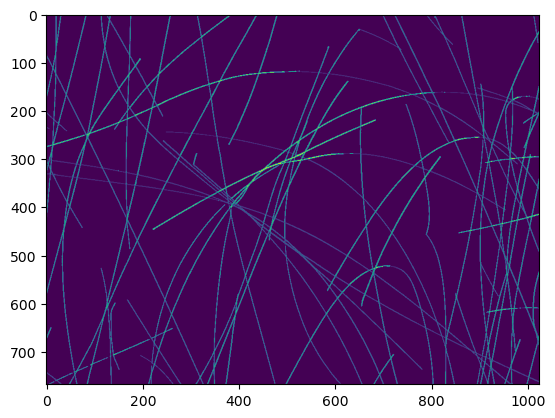

In [73]:
with open('301_full_image_profiled.pickle', 'rb') as file:
    old_profiles = pickle.load(file)
old_img, old_profiles = [val for val in old_profiles.values()]
old_data_array = algos.profiles_to_data_array(old_profiles)
old_angle_img = np.zeros_like(old_img) - 20
for n, (col, row) in enumerate(old_data_array[:,:2].astype(int)):
    old_angle_img[row,col] = old_data_array[n, 2]
plt.imshow(old_angle_img)
print('Precision of 2 degrees, took about 10 hours')

the new way


In [74]:
new_angle_img = algos.radon_angle(img)
new_angle_img = np.where(
    np.isnan(new_angle_img),
    -20,
    new_angle_img
)

100%|█████████████████████████████████████████| 180/180 [00:20<00:00,  8.60it/s]


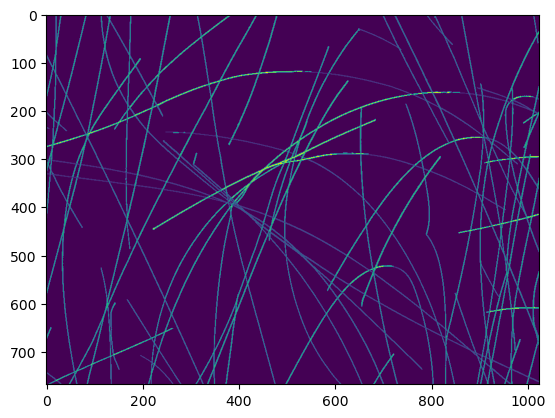

In [75]:
new_angle_subset_img = np.where(
    img > 0,
    new_angle_img,
    -20
)
plt.imshow(new_angle_subset_img)

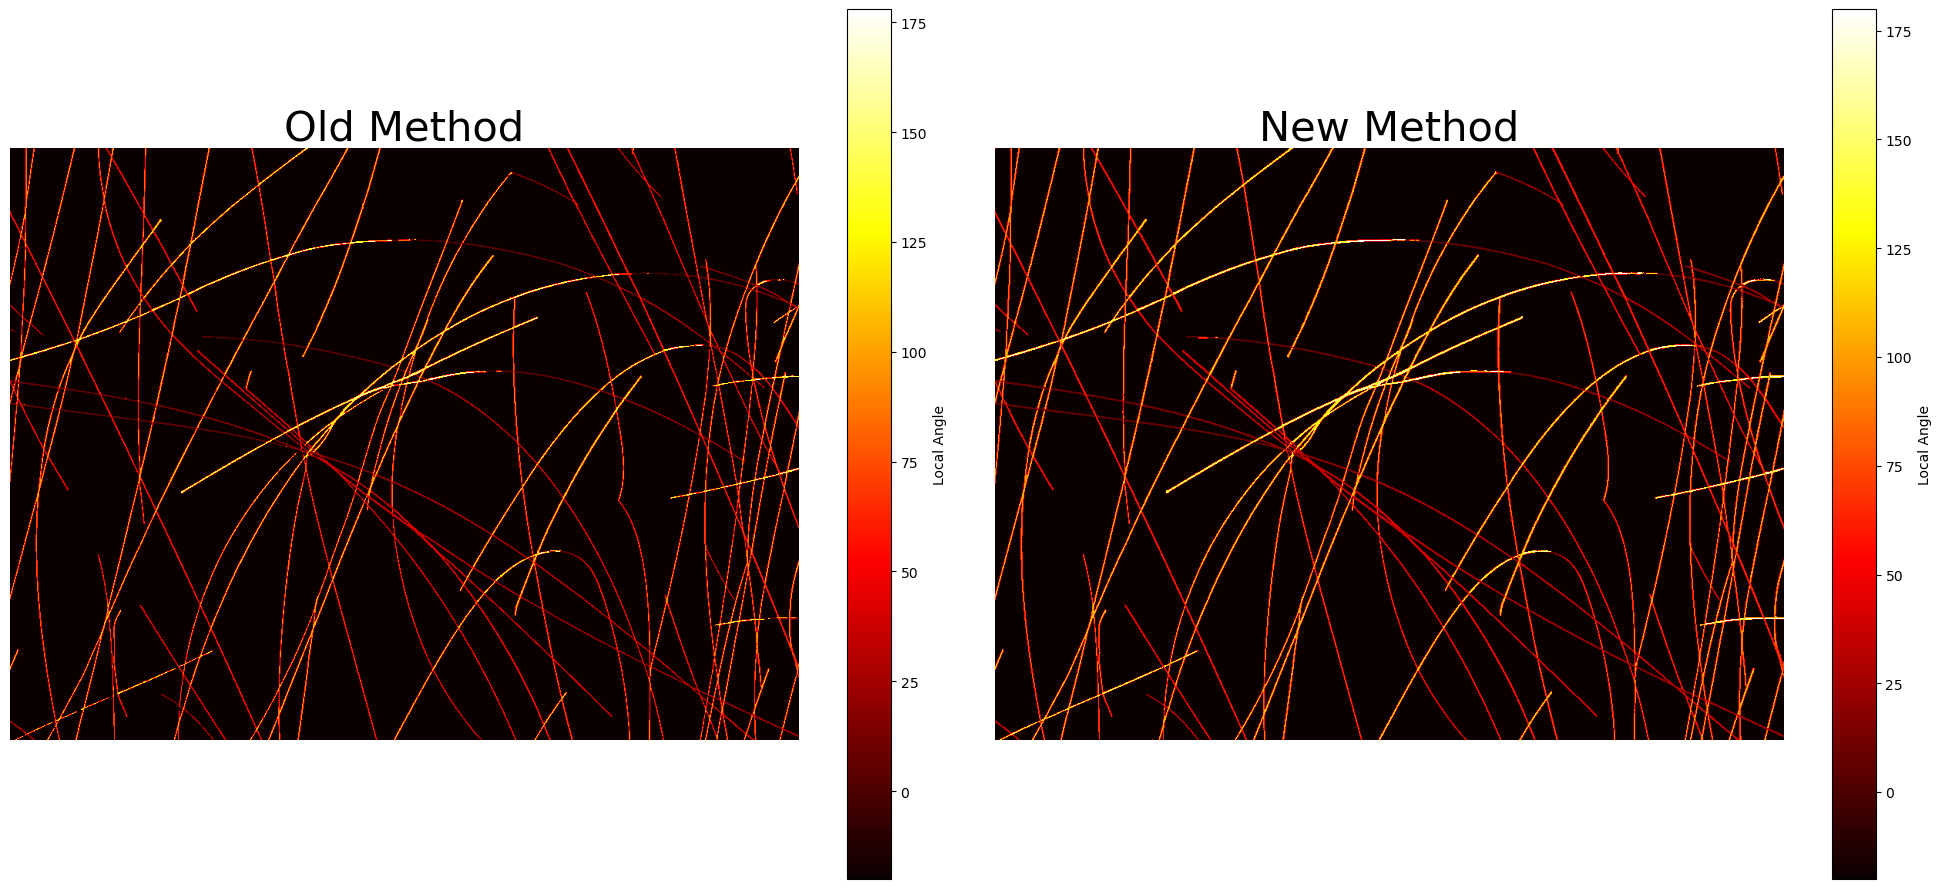

In [76]:
fig, axs = plt.subplots(
    figsize = (20,9),
    ncols = 2
)
for n, angle_img in enumerate([old_angle_img, new_angle_subset_img]):
    ax = axs[n]
    imshow = ax.imshow(
        angle_img,
        cmap = 'hot'
    )
    titles = ['Old Method', 'New Method']
    ax.set_title(titles[n], fontsize = 30)
    ax.set_axis_off()
    fig.colorbar(mappable = imshow, label ='Local Angle')
fig.tight_layout()
plt.savefig('old_vs_new_angle_measurement.png', dpi = 300)